# Proposta da aula: atribuir 2 rasters em uma única array.

In [1]:
import numpy as np


from osgeo import gdal

from osgeo import osr

from gdalconst import *

import sys

import matplotlib.pyplot as plt

In [3]:
#Lembrar que o Numpy não se utiliza de nenhum dado geográfico. Somente o GDAL lê este tipo de informação. O Numpy faz as operações em array.

In [4]:
gdal.UseExceptions()

In [5]:
try:
    #criar o dataset (filename) abrindo o arquivo para leitura (GA_ReadOnly)
    filename_crop_1_banda_5 = r"C:\Users\Philipe Leal\Python\dados_gdal_numpy\crop-1-band-5.tif"
    dataset_filename_crop_1_banda_5 = gdal.Open(filename_crop_1_banda_5, GA_ReadOnly)
    print(dataset_filename_crop_1_banda_5.GetGeoTransform())
    
    filename_crop_1_banda_7 = r"C:\Users\Philipe Leal\Python\dados_gdal_numpy\crop-1-band-7.tif"
    dataset_filename_crop_1_banda_7 = gdal.Open(filename_crop_1_banda_7, GA_ReadOnly)
    print(dataset_filename_crop_1_banda_7.GetGeoTransform())
    
    filename_crop_2_banda_5 = r"C:\Users\Philipe Leal\Python\dados_gdal_numpy\crop-2-band-5.tif"
    dataset_filename_crop_2_banda_5 = gdal.Open(filename_crop_2_banda_5, GA_ReadOnly)
    print(dataset_filename_crop_2_banda_5.GetGeoTransform())
    
    filename_crop_2_banda_7 = r"C:\Users\Philipe Leal\Python\dados_gdal_numpy\crop-2-band-7.tif"
    dataset_filename_crop_2_banda_7 = gdal.Open(filename_crop_2_banda_7, GA_ReadOnly)
    print(dataset_filename_crop_2_banda_7.GetGeoTransform())
    
except RuntimeError, e:
    print(e)
    sys.exit("Erro na abertura do arquivo")
    pass




`C:\Users\Philipe Leal\Python\dados_gdal_numpy\crop-1-band-5.tif' does not exist in the file system,
and is not recognized as a supported dataset name.



SystemExit: Erro na abertura do arquivo

C:\Users\Philipe Leal\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
#Verificar se os rasters são da mesma região, ou não:

print (dataset_filename_crop_1_banda_5.GetGeoTransform() == dataset_filename_crop_1_banda_7.GetGeoTransform())
print (dataset_filename_crop_2_banda_5.GetGeoTransform() == dataset_filename_crop_2_banda_7.GetGeoTransform())
print (dataset_filename_crop_1_banda_5.GetGeoTransform() == dataset_filename_crop_2_banda_7.GetGeoTransform())
print (dataset_filename_crop_1_banda_5.GetGeoTransform() == dataset_filename_crop_2_banda_5.GetGeoTransform())


True
True
False
False


In [6]:
#Verificar se os sistemas de coordenadas são iguais:
print(dataset_filename_crop_1_banda_5.GetProjectionRef() == dataset_filename_crop_2_banda_5.GetProjectionRef())

True


In [7]:
#mostrar a quantidade de bandas de cada imagem

print dataset_filename_crop_1_banda_5.RasterCount
print dataset_filename_crop_1_banda_7.RasterCount
print dataset_filename_crop_2_banda_5.RasterCount
print dataset_filename_crop_2_banda_7.RasterCount

1
1
1
1


In [8]:
# todas as imagens possuem uma banda cada

crop_1_banda_5 = dataset_filename_crop_1_banda_5.GetRasterBand(1)
crop_1_banda_7 = dataset_filename_crop_1_banda_7.GetRasterBand(1)
crop_2_banda_5 = dataset_filename_crop_2_banda_5.GetRasterBand(1)
crop_2_banda_7 = dataset_filename_crop_2_banda_7.GetRasterBand(1)

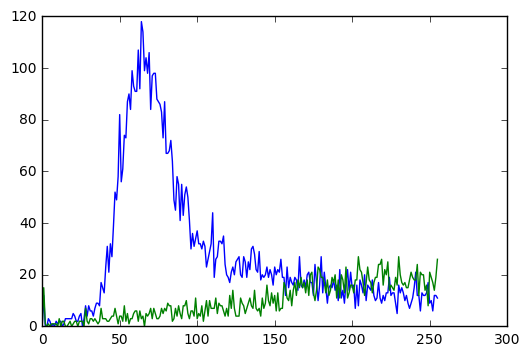

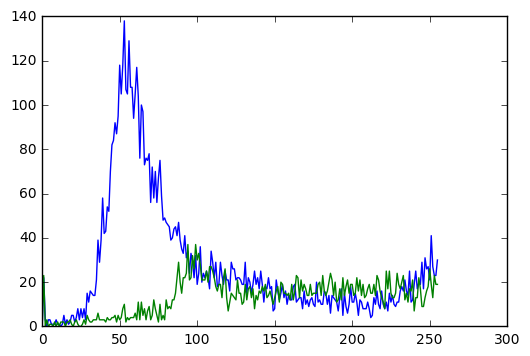

In [9]:
# verificar algumas propriedades das bandas, como o histograma

plt.plot(crop_1_banda_5.GetHistogram())
plt.plot(crop_1_banda_7.GetHistogram())
plt.show()

plt.plot(crop_2_banda_5.GetHistogram())
plt.plot(crop_2_banda_7.GetHistogram())
plt.show()



In [10]:
# para se realizar cálculos com as bandas, usamos a conversão para matriz 

numpy_crop_1_banda_5 = crop_1_banda_5.ReadAsArray()
numpy_crop_1_banda_7 = crop_1_banda_7.ReadAsArray()
numpy_crop_2_banda_5 = crop_2_banda_5.ReadAsArray()
numpy_crop_2_banda_7 = crop_2_banda_7.ReadAsArray()

print(numpy_crop_1_banda_5.shape)
print(numpy_crop_1_banda_7.shape)
print(numpy_crop_2_banda_5.shape)
print(numpy_crop_2_banda_7.shape)



(400L, 400L)
(400L, 400L)
(400L, 400L)
(400L, 400L)


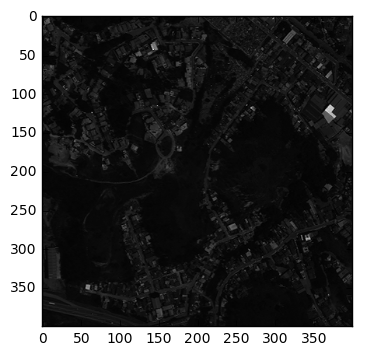

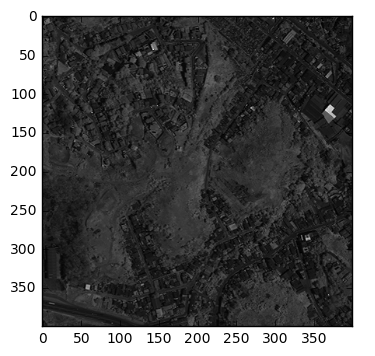

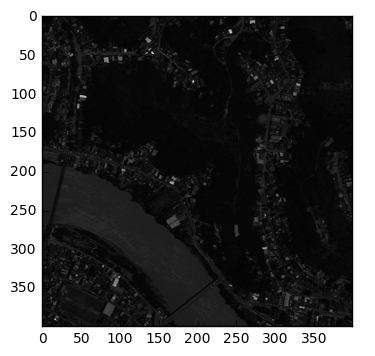

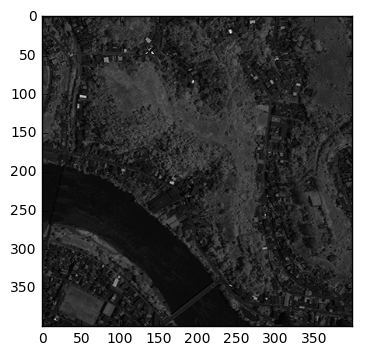

In [11]:
# para visualizar as bandas como imagens

plt.imshow(numpy_crop_1_banda_5, cmap = "gray")
plt.show()

plt.imshow(numpy_crop_1_banda_7, cmap = "gray")
plt.show()

plt.imshow(numpy_crop_2_banda_5, cmap = "gray")
plt.show()

plt.imshow(numpy_crop_2_banda_7, cmap = "gray")
plt.show()

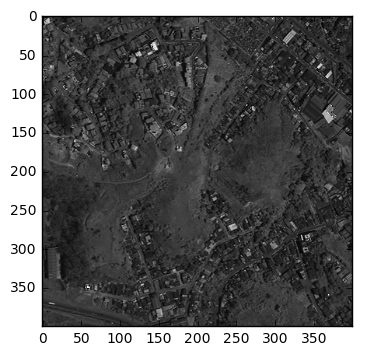

In [12]:
#notar abaixo operação errônea entre imagens que estão localizadas espacialmente diferentes entre si:

# Mesmo que as bandas representadas por matrizes numpy não possuam informações geográficas iguais, o NP opera de qualquer jeito. O numpy não está preocupado com isso. Ele opera as matrizes de qualquer forma, basta que elas tenham o mesmo número de linhas e colunas.

plt.imshow((30 * (numpy_crop_1_banda_5 + numpy_crop_1_banda_7)), cmap = "gray")
plt.show()



NDVI_crop_1 


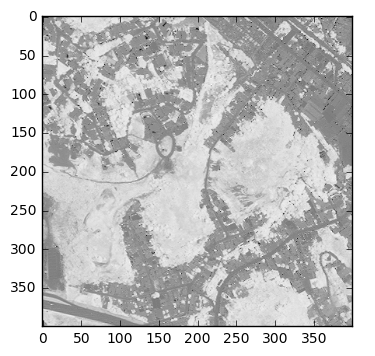

NDVI_crop_1 max = 250.636231884
NDVI_crop_1 min = 2.69892473118
NDVI_crop_2 


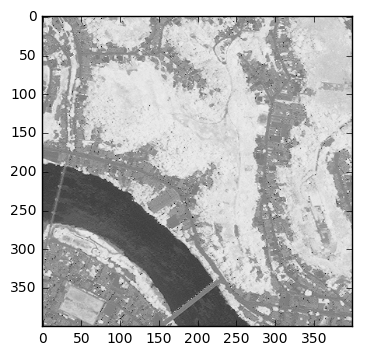

NDVI_crop_2 max = 250.636231884
NDVI_crop_2 min = 2.69892473118


In [13]:
NDVI_crop_1 = ((numpy_crop_1_banda_7.astype(float) - numpy_crop_1_banda_5)/(numpy_crop_1_banda_7 + numpy_crop_1_banda_5))

NDVI_crop_2 = ((numpy_crop_2_banda_7.astype(float)  - numpy_crop_2_banda_5)/(numpy_crop_2_banda_7 + numpy_crop_2_banda_5))

plt.imshow((((125.5 * NDVI_crop_1) + 125.5)), cmap = "gray")
print("NDVI_crop_1 ")
plt.show()

print("NDVI_crop_1 max = {0}".format(((125.5 * NDVI_crop_2) + 125.5).max()))
print("NDVI_crop_1 min = {0}".format(((125.5 * NDVI_crop_2) + 125.5).min()))


plt.imshow((((125.5 * NDVI_crop_2) + 125.5)), cmap = "gray")

print("NDVI_crop_2 ")
plt.show()
print("NDVI_crop_2 max = {0}".format(((125.5 * NDVI_crop_2) + 125.5).max()))
print("NDVI_crop_2 min = {0}".format(((125.5 * NDVI_crop_2) + 125.5).min()))

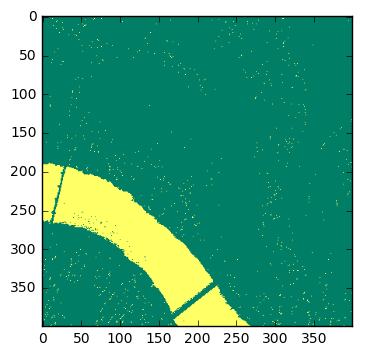

In [14]:
#sugestão de imagem:

plt.imshow((((125.5 * NDVI_crop_2) + 125.5)>100.0), cmap = "summer_r")
plt.show()

In [16]:
#fechar o dataset  e liberar memória

dataset = None